In [2]:
%%time
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Wall time: 1min 11s


             equity    qavgassets
year                             
2013.0  169077000.0  1.928116e+09
(1976.0, 2013.0, -7419608.4000000004, 177481600.40000001)


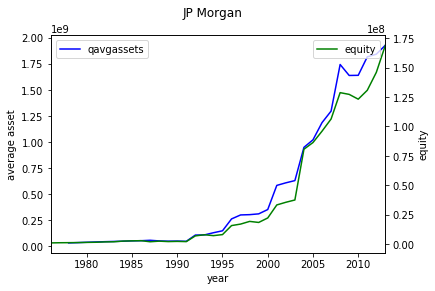

In [3]:
%matplotlib inline
import seaborn as sb
s = df_raw[(df_raw["rssdid"]==852218.0) & (df_raw["quarter"]==4.0)]
s = s[["equity","year", "qavgassets"]]
s = s.set_index("year")
print(s.loc[(s.index==2013)])
fig, ax = plt.subplots()
fig.suptitle("JP Morgan")
ax.set_ylabel("average asset")
ax.set_xlabel("year")
ax2 = ax.twinx()
ax2.set_ylabel("equity")
line1 = s["qavgassets"].plot(ax=ax, style="b-", use_index=True)
line2 = s["equity"].plot(ax=ax2, style="g-")
ax.legend(["qavgassets"])
ax2.legend(["equity"])
print(plt.axis())
s.equity = s.equity*10

Wall time: 0 ns
(1975.0, 2012.0, -86063384.0, 2024029304.0)


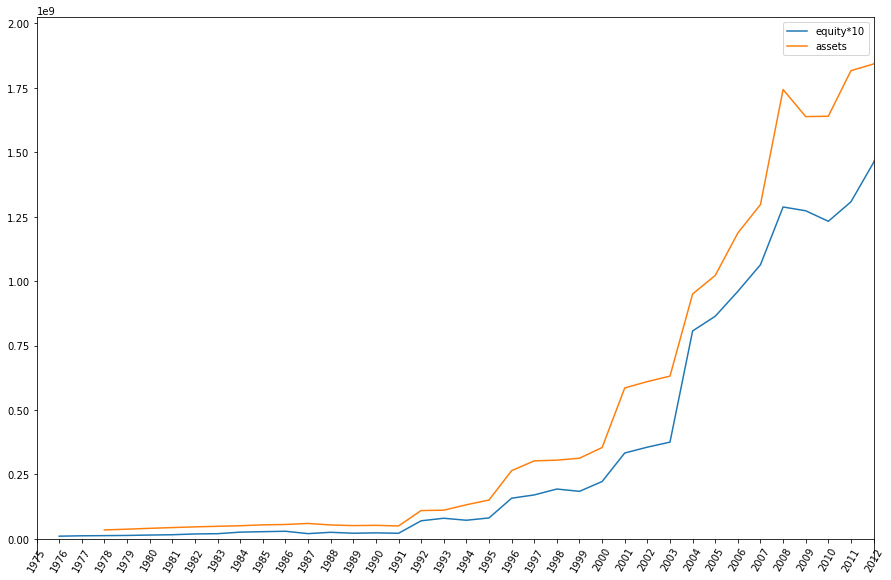

In [197]:

%time
plt.figure(figsize=(15,10))
ax1 = plt.gca()
fig = plt.gcf()
#ax1.spines["top"].set_color("none")
#ax1.spines["right"].set_color("none")
ax1.xaxis.set_ticks_position("bottom")
ax1.spines["bottom"].set_position(("data",0))
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(("data", 1975))
plt.xticks(range(1975,2013),rotation = 60)
#fig.set_size_inches(15,10)
ax1.set_xlim([1975,2012])
plt.plot(s)
plt.legend(["equity*10","assets"], loc="best")
print(plt.axis())
